Running Sensitivity Analysis...

Testing Ridge...
Running Backtest for Ridge_Pred...
Running Backtest for Ridge_Pred...
Running Backtest for Ridge_Pred...
Running Backtest for Ridge_Pred...
Running Backtest for Ridge_Pred...
Running Backtest for Ridge_Pred...
Running Backtest for Ridge_Pred...
Running Backtest for Ridge_Pred...
Running Backtest for Ridge_Pred...
Running Backtest for Ridge_Pred...
Running Backtest for Ridge_Pred...
Running Backtest for Ridge_Pred...
Running Backtest for Ridge_Pred...
Running Backtest for Ridge_Pred...
Running Backtest for Ridge_Pred...
Running Backtest for Ridge_Pred...
Running Backtest for Ridge_Pred...
Running Backtest for Ridge_Pred...
Running Backtest for Ridge_Pred...
Running Backtest for Ridge_Pred...
Testing LSTM...
Running Backtest for LSTM_Pred...
Running Backtest for LSTM_Pred...
Running Backtest for LSTM_Pred...
Running Backtest for LSTM_Pred...
Running Backtest for LSTM_Pred...
Running Backtest for LSTM_Pred...
Running Backtest for LSTM_Pred

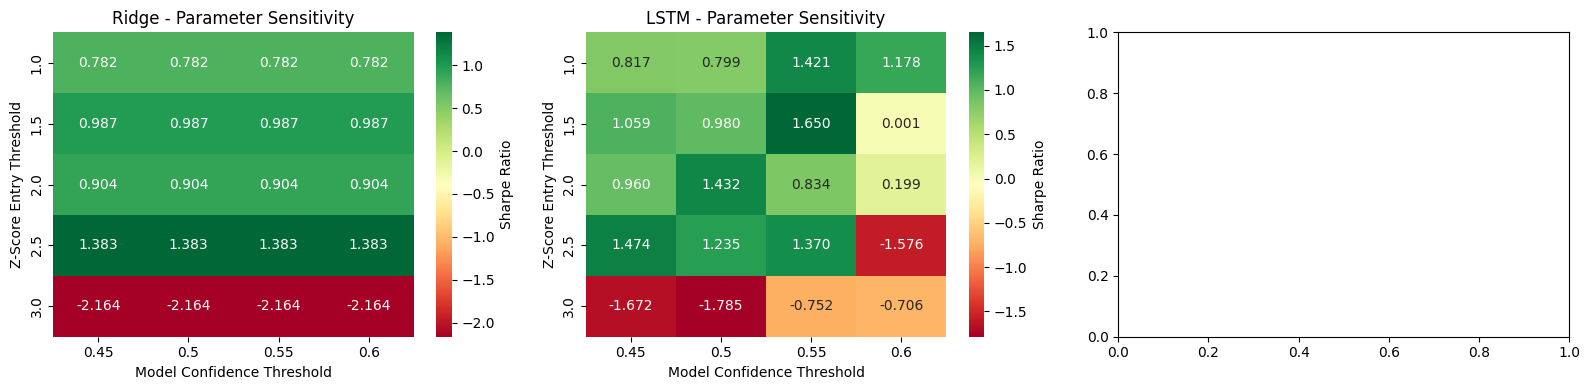


✅ Sensitivity analysis complete!
   Results saved to ../outputs/sensitivity_analysis.png

Interpretation:
  - Greener = Better Sharpe Ratio
  - Look for stable regions (consistent green across ranges)
  - Avoid red zones (parameter combinations that underperform)


: 

In [ ]:
import sys
import os

# Fix the path FIRST - before any imports from src
sys.path.append(os.path.abspath(os.path.join('..')))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.engine import BacktestEngine

# Load predictions (already generated)
df = pd.read_csv('../data/processed/05_model_predictions.csv', index_col='DateTime', parse_dates=True)
df_test = df[df.index >= '2024-01-01']

print("Running Sensitivity Analysis...\n")

# Parameters to test
z_thresholds = [1.0, 1.5, 2.0, 2.5, 3.0]  # Entry threshold
confidence_levels = [0.45, 0.50, 0.55, 0.60]  # Model confidence threshold

models = ['Ridge', 'LSTM']
model_cols = {'Ridge': 'Ridge_Pred',  'LSTM': 'LSTM_Pred'}

results = {}

# Test each model
for model_name in models:
    print(f"Testing {model_name}...")
    results[model_name] = []
    
    for z_threshold in z_thresholds:
        row = []
        for confidence in confidence_levels:
            # Create modified engine with custom parameters
            engine = BacktestEngine(initial_capital=10000)
            engine.ENTRY_Z = z_threshold
            engine.MODEL_CONFIDENCE = confidence
            
            # Run backtest
            equity_curve = engine.run(df_test, model_col_name=model_cols[model_name])
            
            # Calculate Sharpe Ratio
            returns = equity_curve.pct_change().dropna()
            sharpe = (returns.mean() / returns.std()) * (252**0.5) if returns.std() > 0 else 0
            
            row.append(sharpe)
        results[model_name].append(row)

# Plot heatmaps for each model
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for idx, model_name in enumerate(models):
    data = np.array(results[model_name])
    
    sns.heatmap(data, 
                xticklabels=confidence_levels, 
                yticklabels=z_thresholds,
                annot=True, 
                fmt='.3f',
                cmap='RdYlGn',
                ax=axes[idx],
                cbar_kws={'label': 'Sharpe Ratio'})
    
    axes[idx].set_title(f'{model_name} - Parameter Sensitivity')
    axes[idx].set_xlabel('Model Confidence Threshold')
    axes[idx].set_ylabel('Z-Score Entry Threshold')

plt.tight_layout()
plt.savefig('../outputs/sensitivity_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Sensitivity analysis complete!")
print("   Results saved to ../outputs/sensitivity_analysis.png")
print("\nInterpretation:")
print("  - Greener = Better Sharpe Ratio")
print("  - Look for stable regions (consistent green across ranges)")
print("  - Avoid red zones (parameter combinations that underperform)")